In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_theme()
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [119]:
app_train_df = pd.read_csv('home-credit-default-risk\\application_train.csv')

In [120]:
app_train_df['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts()

0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
25.0         11
24.0         11
27.0          5
26.0          3
30.0          2
28.0          1
29.0          1
47.0          1
348.0         1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [121]:
def check_missed_values(df):
    df_null_percentage = df.isnull().sum() / df.shape[0] * 100
    df_null_percentage = df_null_percentage.drop(df_null_percentage[df_null_percentage == 0].index).sort_values(ascending= False).reset_index()
    df_null_percentage.columns = ["Feature", "Percentage"]
    return df_null_percentage

null_df = check_missed_values(app_train_df)
null_df

,Feature,Percentage
0,COMMONAREA_MEDI,69.872297
1,COMMONAREA_AVG,69.872297
2,COMMONAREA_MODE,69.872297
3,NONLIVINGAPARTMENTS_MEDI,69.432963
4,NONLIVINGAPARTMENTS_MODE,69.432963
...,...,...
62,EXT_SOURCE_2,0.214626
63,AMT_GOODS_PRICE,0.090403
64,AMT_ANNUITY,0.003902
65,CNT_FAM_MEMBERS,0.000650


In [122]:
app_train_df['DAYS_EMPLOYED'][app_train_df['DAYS_EMPLOYED'] == 365243] = np.nan
app_train_df.loc[app_train_df['OBS_30_CNT_SOCIAL_CIRCLE'] > 30, 'OBS_30_CNT_SOCIAL_CIRCLE'] = np.nan
app_train_df.loc[app_train_df['OBS_60_CNT_SOCIAL_CIRCLE'] > 30, 'OBS_60_CNT_SOCIAL_CIRCLE'] = np.nan
app_train_df = app_train_df[app_train_df["CODE_GENDER"] != "XNA"]

## Documents Flag

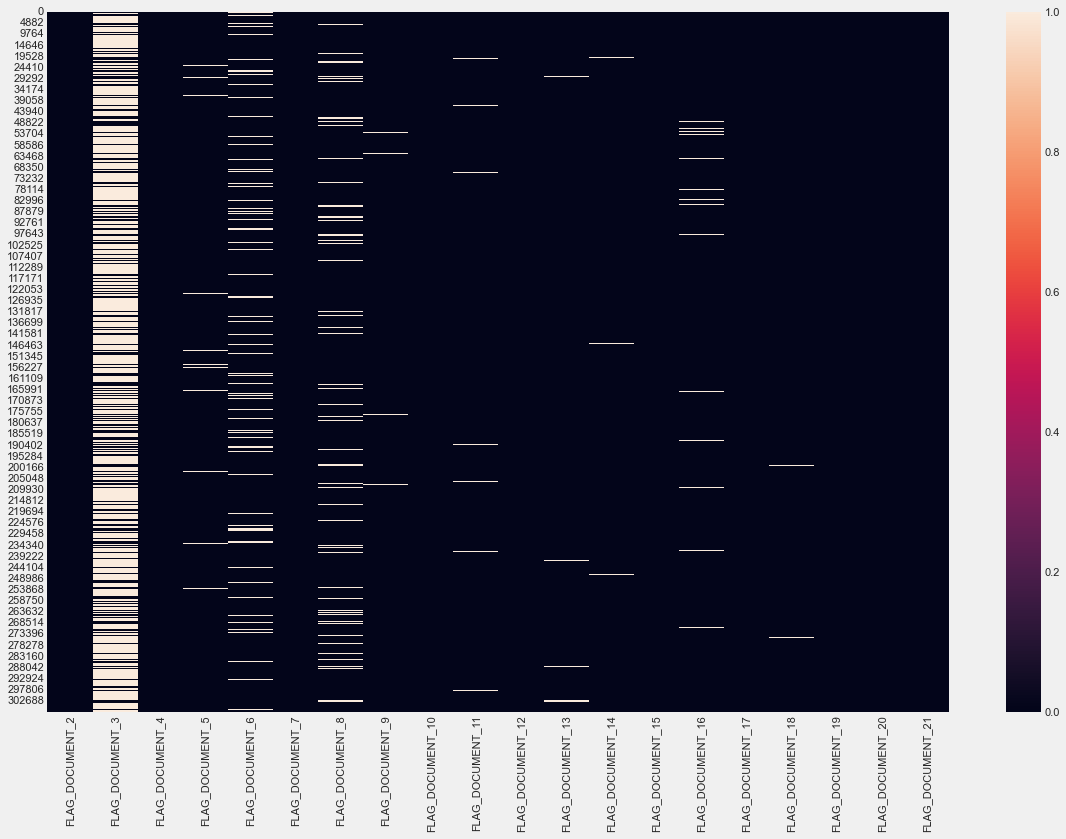

In [123]:
starting_idx = app_train_df.columns.get_loc("FLAG_DOCUMENT_2")
ending_idx = app_train_df.columns.get_loc("FLAG_DOCUMENT_21")+1

plt.figure(figsize=(18,12))
sns.heatmap(app_train_df.iloc[:,starting_idx:ending_idx])
plt.show()

## có vẻ hầu hết các documents không được cung cấp đầy đủ ngoại trừ DOCUMENT_3

[Text(0.5, 1.0, 'Defaulter')]

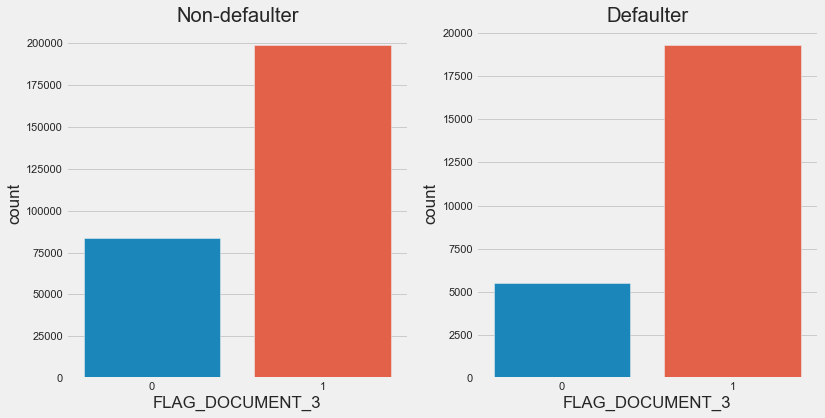

In [124]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.countplot(app_train_df[app_train_df["TARGET"] == 0]["FLAG_DOCUMENT_3"], ax= ax[0]).set(title = "Non-defaulter")
sns.countplot(app_train_df[app_train_df["TARGET"] == 1]["FLAG_DOCUMENT_3"], ax= ax[1]).set(title = "Defaulter")

## tỉ lệ cung cấp DOCUMENT_3 trong cả 2 trường hợp là gần giống nhau vậy nên các biến DOCUMENT có thể drop do không có quá nhiều ảnh hưởng lên biến TARGET

## Asset Details
## 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'OWN_CAR_AGE'


<AxesSubplot:xlabel='FLAG_OWN_CAR', ylabel='count'>

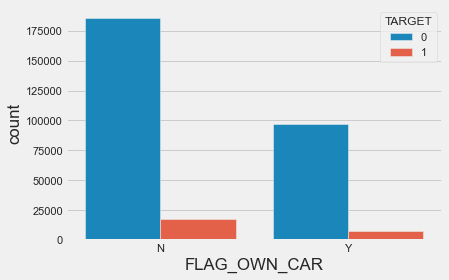

In [125]:
sns.countplot(app_train_df['FLAG_OWN_CAR'], hue= app_train_df['TARGET'])

In [126]:
def defaulter_percentage_count_per_cat(df, col):
    summary = []
    for cat in df[col].unique():
        default_count = df[(df[col] == cat) & (df.TARGET == 1)].shape[0]
        total_count = df[df[col] == cat].shape[0]
        summary.append([cat ,default_count * 100 / total_count])

    report_df = pd.DataFrame(summary)
    report_df.columns = ["Categories", "Percentage_Of_Default"]
    return report_df.sort_values(by='Percentage_Of_Default', ascending=False)
defaulter_percentage_count_per_cat(app_train_df, 'FLAG_OWN_CAR')

,Categories,Percentage_Of_Default
0,N,8.500310
1,Y,7.243869


<AxesSubplot:xlabel='FLAG_OWN_REALTY', ylabel='count'>

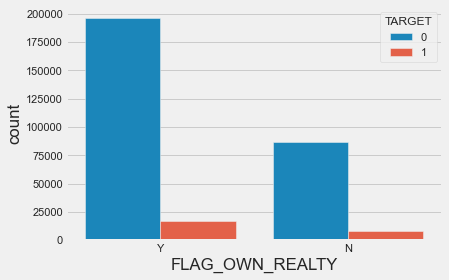

In [127]:
sns.countplot(app_train_df['FLAG_OWN_REALTY'], hue= app_train_df['TARGET'])

In [128]:
defaulter_percentage_count_per_cat(app_train_df, 'FLAG_OWN_REALTY')

,Categories,Percentage_Of_Default
1,N,8.324929
0,Y,7.961727


[Text(0.5, 1.0, 'Defaulter')]

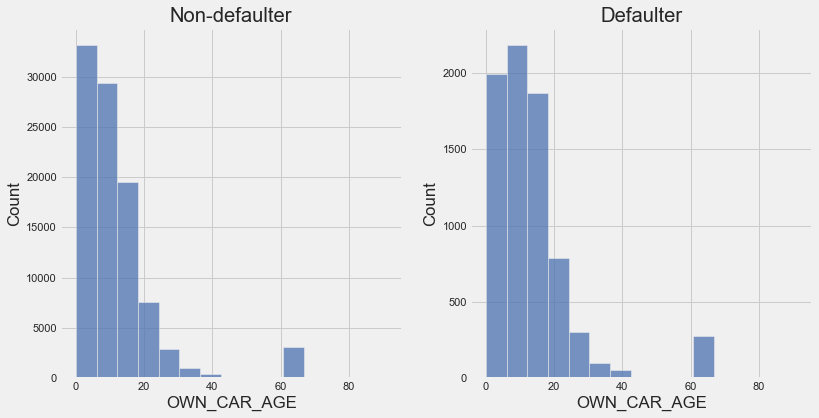

In [129]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.histplot(app_train_df[app_train_df["TARGET"] == 0]['OWN_CAR_AGE'], bins= 15, ax= ax[0]).set(title = "Non-defaulter")
sns.histplot(app_train_df[app_train_df["TARGET"] == 1]['OWN_CAR_AGE'], bins= 15, ax= ax[1]).set(title = "Defaulter")

## Hầu hết khách hàng sở hữu xe và realty. Những khách hàng không sở hữu có tỉ lệ võ nợ cao hơn 1 vài % nhỏ
## Hầu hết tuổi sở hữu xe hơi nằm trong khoảng 0 - 25 và một số ít 60
## Có thể drop các biến ASSET

##  Housing Information

In [130]:
start = app_train_df.columns.get_loc('APARTMENTS_AVG')
end = app_train_df.columns.get_loc('EMERGENCYSTATE_MODE')

housing_df = app_train_df.iloc[:, start : end+1]
housing_df['TARGET'] = app_train_df["TARGET"]
housing_df['NAME_HOUSING_TYPE'] = app_train_df["NAME_HOUSING_TYPE"]

In [131]:
check_missed_values(housing_df)

,Feature,Percentage
0,COMMONAREA_MEDI,69.872231
1,COMMONAREA_AVG,69.872231
2,COMMONAREA_MODE,69.872231
3,NONLIVINGAPARTMENTS_MODE,69.433216
4,NONLIVINGAPARTMENTS_MEDI,69.433216
5,NONLIVINGAPARTMENTS_AVG,69.433216
6,FONDKAPREMONT_MODE,68.386411
7,LIVINGAPARTMENTS_MEDI,68.355192
8,LIVINGAPARTMENTS_MODE,68.355192
9,LIVINGAPARTMENTS_AVG,68.355192


In [132]:
housing_df.columns

Index(['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_M

## Hầu hết các cột bị null rất nhiều nên ta có thể drop các cột Housing Information
## Giữ lại cột

## Social Info

In [133]:
social_df = app_train_df[["OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE"]]

<AxesSubplot:>

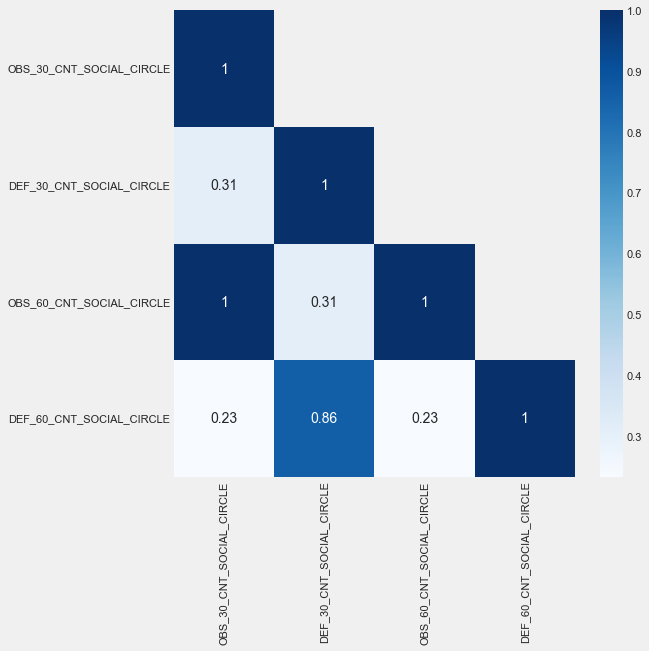

In [134]:
mask = np.zeros_like(social_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False
plt.figure(figsize=(8,8))
sns.heatmap(social_df.corr(), annot=True, mask= mask, cmap= "Blues")

## OBS_60_CNT_SOCIAL_CIRCLE và OBS_30_CNT_SOCIAL_CIRCLE là 2 cột giống hệt nhau
## DEF_30_CNT_SOCIAL_CIRCLE và DEF_60_CNT_SOCIAL_CIRCLE có hệ số tương quan cao
## Drop các cột 30

[Text(0.5, 1.0, 'Defaulter')]

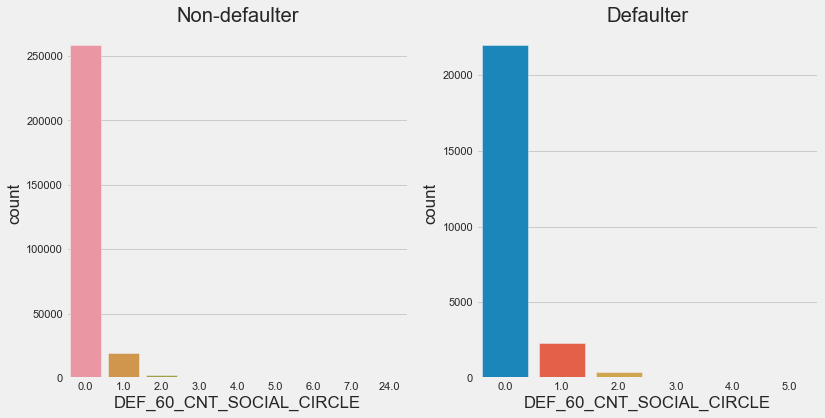

In [135]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.countplot(app_train_df[app_train_df["TARGET"] == 0]['DEF_60_CNT_SOCIAL_CIRCLE'], ax= ax[0]).set(title = "Non-defaulter")
sns.countplot(app_train_df[app_train_df["TARGET"] == 1]['DEF_60_CNT_SOCIAL_CIRCLE'], ax= ax[1]).set(title = "Defaulter")

[Text(0.5, 1.0, 'Defaulter')]

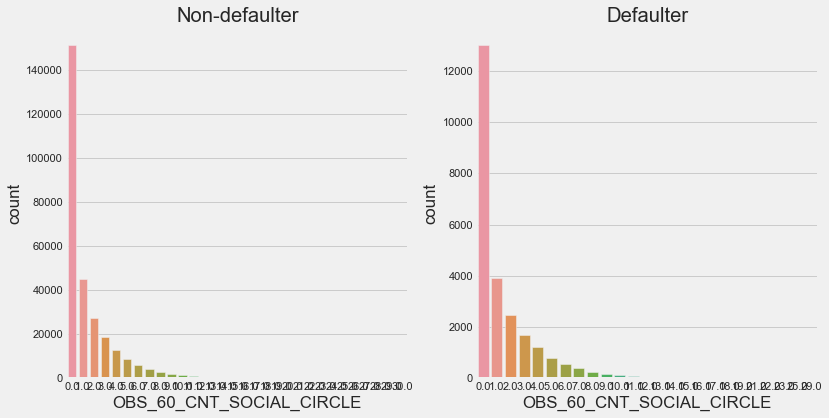

In [136]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.countplot(app_train_df[app_train_df["TARGET"] == 0]['OBS_60_CNT_SOCIAL_CIRCLE'], ax= ax[0]).set(title = "Non-defaulter")
sns.countplot(app_train_df[app_train_df["TARGET"] == 1]['OBS_60_CNT_SOCIAL_CIRCLE'], ax= ax[1]).set(title = "Defaulter")

## Hai feature còn lại cũng có trend giống nhau trong cả 2 trường hợp của biến Target
## Có thể bỏ tất cả các biến Social Info

## Region info

<AxesSubplot:>

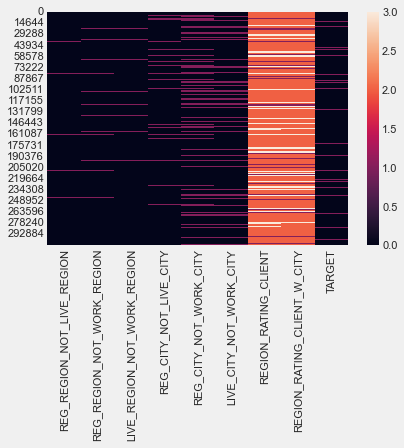

In [137]:
start = app_train_df.columns.get_loc('REG_REGION_NOT_LIVE_REGION')
end = app_train_df.columns.get_loc('LIVE_CITY_NOT_WORK_CITY')

region_df = app_train_df.iloc[:, start : end+1]
region_df['REGION_RATING_CLIENT'] = app_train_df['REGION_RATING_CLIENT']
region_df['REGION_RATING_CLIENT_W_CITY'] = app_train_df['REGION_RATING_CLIENT_W_CITY']
region_df['TARGET'] = app_train_df['TARGET']

sns.heatmap(region_df)

## REG_REGION_NOT_LIVE_REGION chứa hầu hết các giá trị 0 có thể drop
## REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION gần giống nhau có thể loại 1 trong 2
## REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY columns gần giống nhau có thể loại 1 trong 2
## Giữ các cột REG_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY REGION_POPULATION_RELATIVE


## Contact Info

<AxesSubplot:>

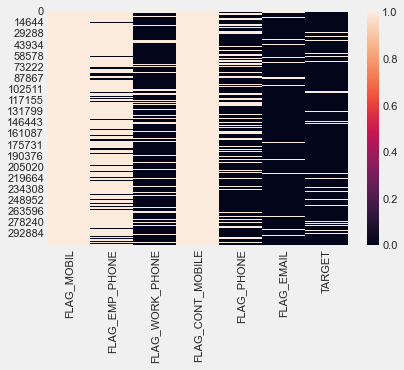

In [138]:
contact_df = app_train_df[['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE', 'TARGET']]
sns.heatmap(contact_df.drop('DAYS_LAST_PHONE_CHANGE', axis=1))

## Hầu hết các biến này đều là các biến Cat (0 - 1)
## Các biến này không có pattern liên hệ với biến Target nên ta có thể bỏ những biến này đi

## Family Info

<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='count'>

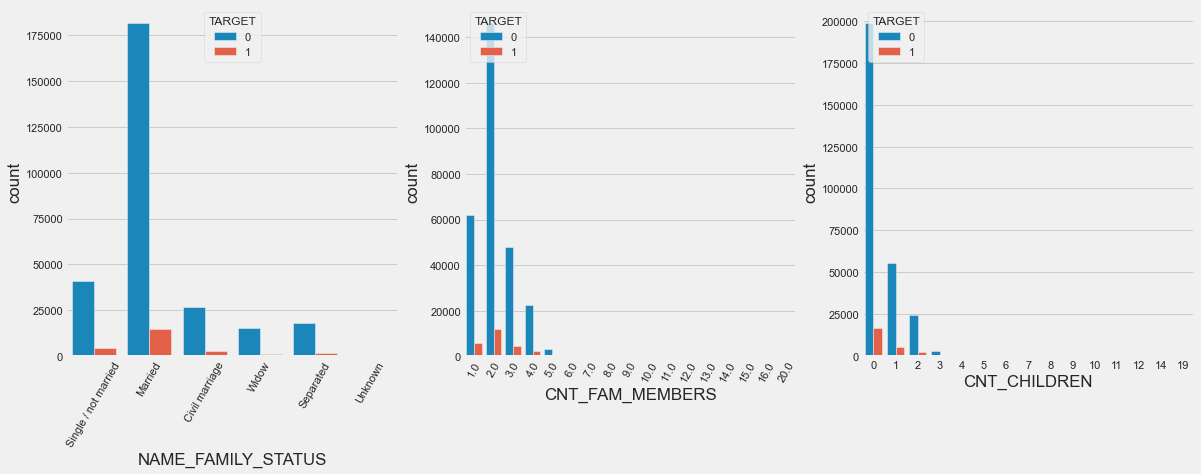

In [139]:
fig, ax = plt.subplots(1,3, figsize= (18,6))
sns.countplot(app_train_df['NAME_FAMILY_STATUS'], hue=app_train_df['TARGET'], ax= ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation= 60)
sns.countplot(app_train_df['CNT_FAM_MEMBERS'], hue=app_train_df['TARGET'], ax= ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation= 60)
sns.countplot(app_train_df['CNT_CHILDREN'], hue=app_train_df['TARGET'], ax= ax[2])

## giữ CNT_FAM_MEMBERS CNT_CHILDREN vì tuy distribution giống nhau nhưng 2 và 0 chiếm số lượng lớn
## giữ NAME_FAMILY_STATUS

## Education and Occupation info

[Text(0, 0, 'Laborers'),
 Text(1, 0, 'Core staff'),
 Text(2, 0, 'Accountants'),
 Text(3, 0, 'Managers'),
 Text(4, 0, 'Drivers'),
 Text(5, 0, 'Sales staff'),
 Text(6, 0, 'Cleaning staff'),
 Text(7, 0, 'Cooking staff'),
 Text(8, 0, 'Private service staff'),
 Text(9, 0, 'Medicine staff'),
 Text(10, 0, 'Security staff'),
 Text(11, 0, 'High skill tech staff'),
 Text(12, 0, 'Waiters/barmen staff'),
 Text(13, 0, 'Low-skill Laborers'),
 Text(14, 0, 'Realty agents'),
 Text(15, 0, 'Secretaries'),
 Text(16, 0, 'IT staff'),
 Text(17, 0, 'HR staff')]

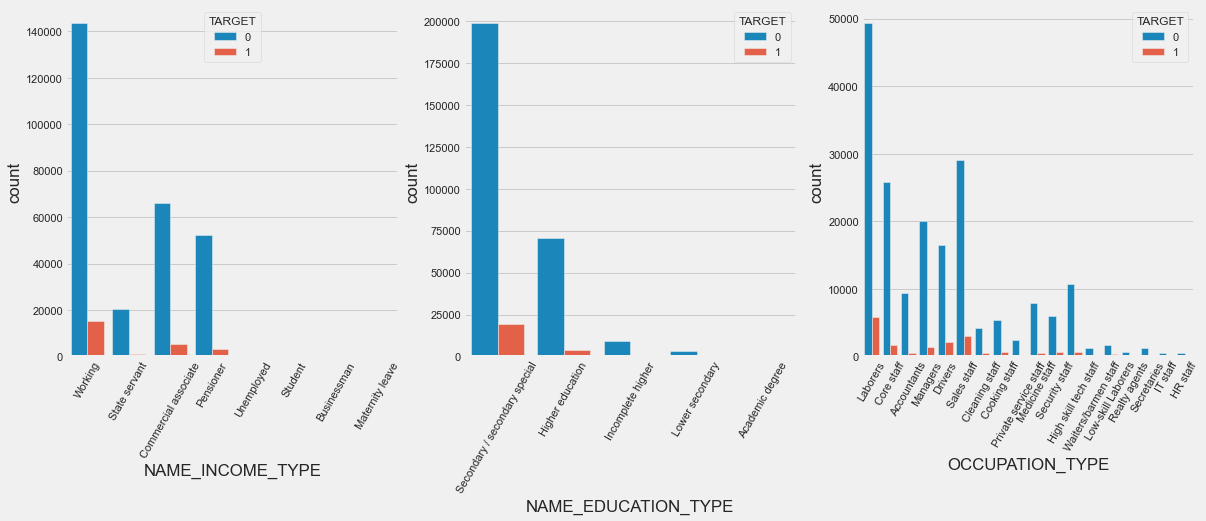

In [140]:
fig, ax = plt.subplots(1,3, figsize= (18,6))
sns.countplot(app_train_df['NAME_INCOME_TYPE'], hue=app_train_df['TARGET'], ax= ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation= 60)
sns.countplot(app_train_df['NAME_EDUCATION_TYPE'], hue=app_train_df['TARGET'], ax= ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation= 60)
sns.countplot(app_train_df['OCCUPATION_TYPE'], hue=app_train_df['TARGET'], ax= ax[2])
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation= 60)

## 3 biến này có thể giữ lại

In [141]:
app_train_df['OCCUPATION_TYPE'].fillna("Unknown", inplace=True)

[Text(0.5, 1.0, 'Defaulter')]

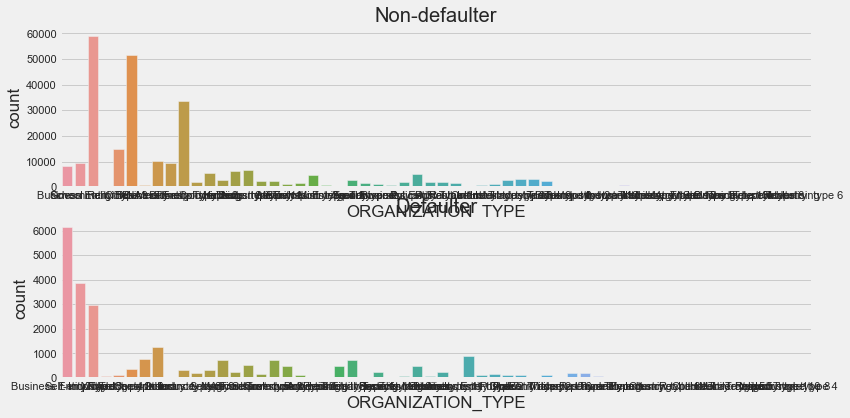

In [176]:
fig, ax = plt.subplots(2,1, figsize= (12,6))
sns.countplot(x = app_train_df[app_train_df["TARGET"] == 0]['ORGANIZATION_TYPE'], ax= ax[0]).set(title = "Non-defaulter")
sns.countplot(x = app_train_df[app_train_df["TARGET"] == 1]['ORGANIZATION_TYPE'], ax= ax[1]).set(title = "Defaulter")

##  DAYS info
 DAYS_BIRTH DAYS_EMPLOYED DAYS_REGISTRATION DAYS_ID_PUBLISH WEEKDAY_APPR_PROCESS_START HOUR_APPR_PROCESS_START

In [142]:
app_train_df['AGE'] = app_train_df['DAYS_BIRTH']/(-365)
app_train_df.drop("DAYS_BIRTH", inplace=True, axis=1)

[Text(0.5, 1.0, 'Defaulter')]

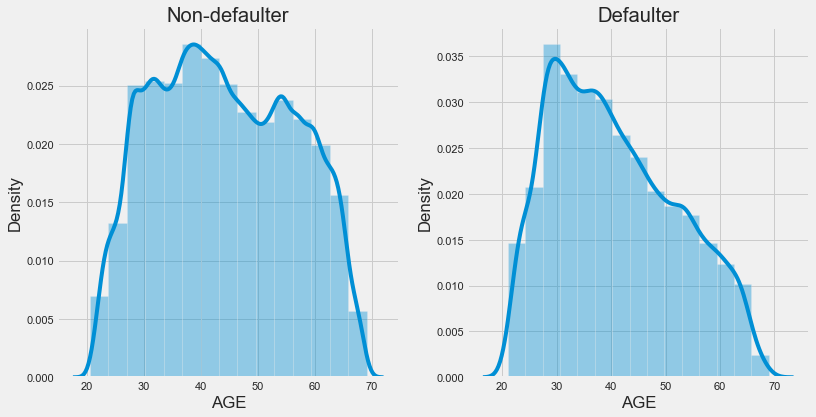

In [144]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.distplot(app_train_df[app_train_df["TARGET"] == 0]['AGE'], bins= 15, ax= ax[0]).set(title = "Non-defaulter")
sns.distplot(app_train_df[app_train_df["TARGET"] == 1]['AGE'], bins= 15, ax= ax[1]).set(title = "Defaulter")

[Text(0.5, 1.0, 'Defaulter')]

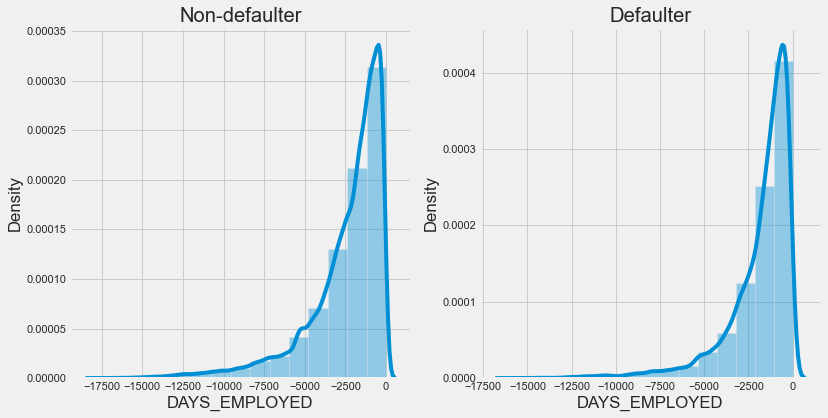

In [145]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.distplot(app_train_df[app_train_df["TARGET"] == 0]['DAYS_EMPLOYED'], bins= 15, ax= ax[0]).set(title = "Non-defaulter")
sns.distplot(app_train_df[app_train_df["TARGET"] == 1]['DAYS_EMPLOYED'], bins= 15, ax= ax[1]).set(title = "Defaulter")

[Text(0.5, 1.0, 'Defaulter')]

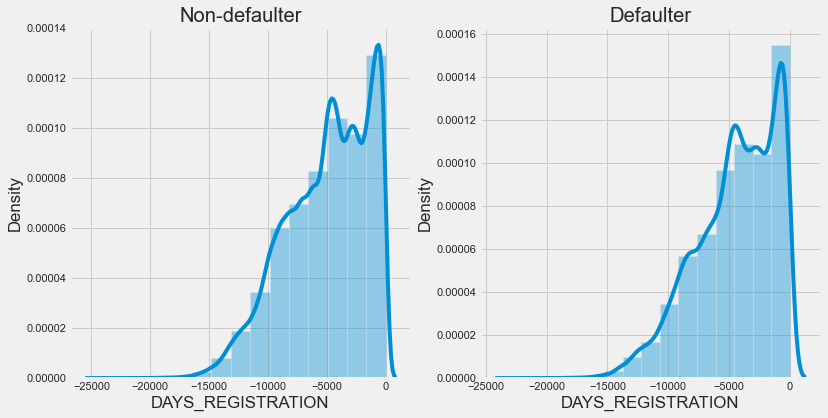

In [146]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.distplot(app_train_df[app_train_df["TARGET"] == 0]['DAYS_REGISTRATION'], bins= 15, ax= ax[0]).set(title = "Non-defaulter")
sns.distplot(app_train_df[app_train_df["TARGET"] == 1]['DAYS_REGISTRATION'], bins= 15, ax= ax[1]).set(title = "Defaulter")

[Text(0.5, 1.0, 'Defaulter')]

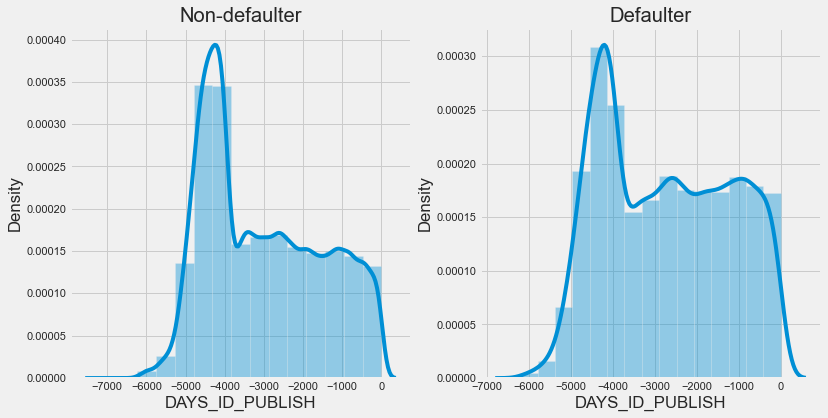

In [154]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.distplot(app_train_df[app_train_df["TARGET"] == 0]['DAYS_ID_PUBLISH'], bins= 15, ax= ax[0]).set(title = "Non-defaulter")
sns.distplot(app_train_df[app_train_df["TARGET"] == 1]['DAYS_ID_PUBLISH'], bins= 15, ax= ax[1]).set(title = "Defaulter")

[Text(0.5, 1.0, 'Defaulter')]

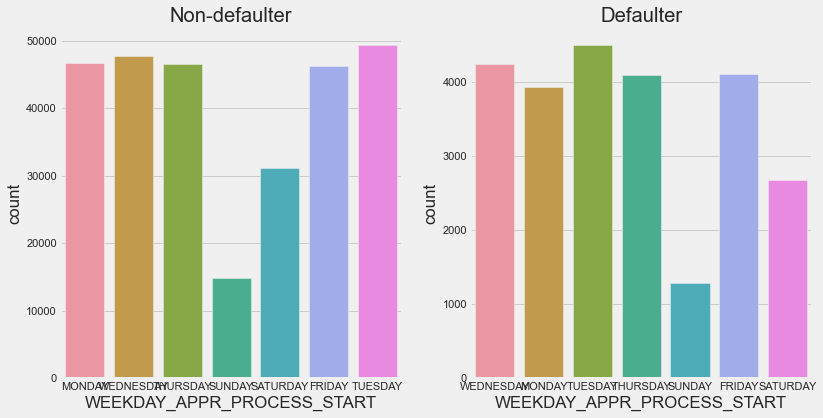

In [155]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.countplot(app_train_df[app_train_df["TARGET"] == 0]['WEEKDAY_APPR_PROCESS_START'], ax= ax[0]).set(title = "Non-defaulter")
sns.countplot(app_train_df[app_train_df["TARGET"] == 1]['WEEKDAY_APPR_PROCESS_START'], ax= ax[1]).set(title = "Defaulter")

[Text(0.5, 1.0, 'Defaulter')]

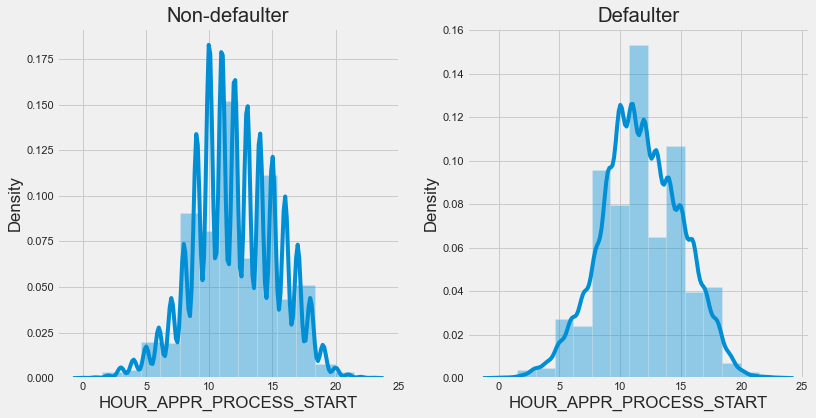

In [177]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.distplot(app_train_df[app_train_df["TARGET"] == 0]['HOUR_APPR_PROCESS_START'], bins= 15, ax= ax[0]).set(title = "Non-defaulter")
sns.distplot(app_train_df[app_train_df["TARGET"] == 1]['HOUR_APPR_PROCESS_START'], bins= 15, ax= ax[1]).set(title = "Defaulter")

## Giữ AGE bỏ các feature còn lại

## Bureau
## drop các cột bureau vì hầu hết toàn giá trị 0

[Text(0.5, 1.0, 'Defaulter')]

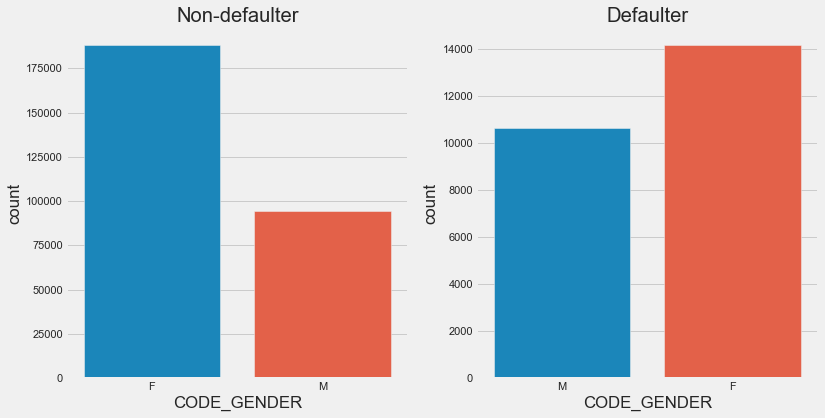

In [156]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.countplot(app_train_df[app_train_df["TARGET"] == 0]['CODE_GENDER'], ax= ax[0]).set(title = "Non-defaulter")
sns.countplot(app_train_df[app_train_df["TARGET"] == 1]['CODE_GENDER'], ax= ax[1]).set(title = "Defaulter")

[Text(0.5, 1.0, 'Defaulter')]

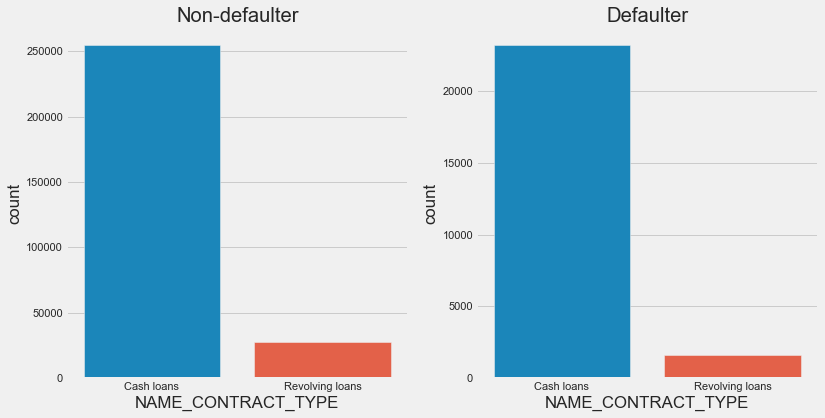

In [162]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.countplot(app_train_df[app_train_df["TARGET"] == 0]['NAME_CONTRACT_TYPE'], ax= ax[0]).set(title = "Non-defaulter")
sns.countplot(app_train_df[app_train_df["TARGET"] == 1]['NAME_CONTRACT_TYPE'], ax= ax[1]).set(title = "Defaulter")

[Text(0.5, 1.0, 'Defaulter')]

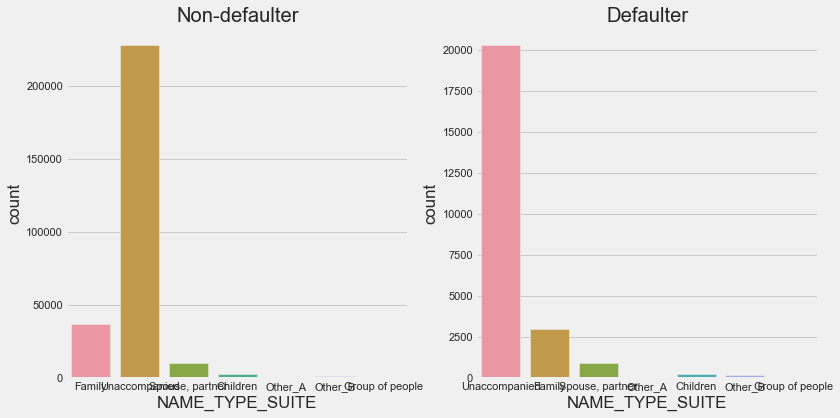

In [163]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.countplot(app_train_df[app_train_df["TARGET"] == 0]['NAME_TYPE_SUITE'], ax= ax[0]).set(title = "Non-defaulter")
sns.countplot(app_train_df[app_train_df["TARGET"] == 1]['NAME_TYPE_SUITE'], ax= ax[1]).set(title = "Defaulter")

## Income and Annuity

<AxesSubplot:xlabel='AMT_ANNUITY'>

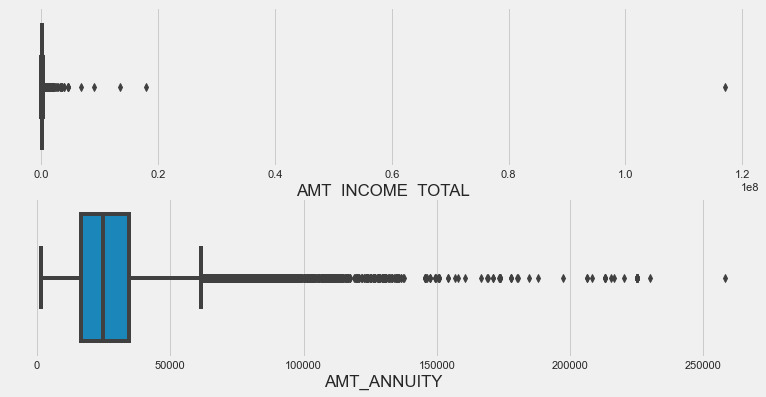

In [164]:
fig, ax = plt.subplots(2,1, figsize= (12,6))
sns.boxplot(app_train_df['AMT_INCOME_TOTAL'], ax= ax[0])
sns.boxplot(app_train_df['AMT_ANNUITY'], ax= ax[1])

In [165]:
# Remove outliners 99 percentile
app_train_df = app_train_df[app_train_df['AMT_ANNUITY'] < np.nanpercentile(app_train_df['AMT_ANNUITY'], 99)]
app_train_df = app_train_df[app_train_df['AMT_INCOME_TOTAL'] < np.nanpercentile(app_train_df['AMT_INCOME_TOTAL'], 99)]

[Text(0.5, 1.0, 'Defaulter')]

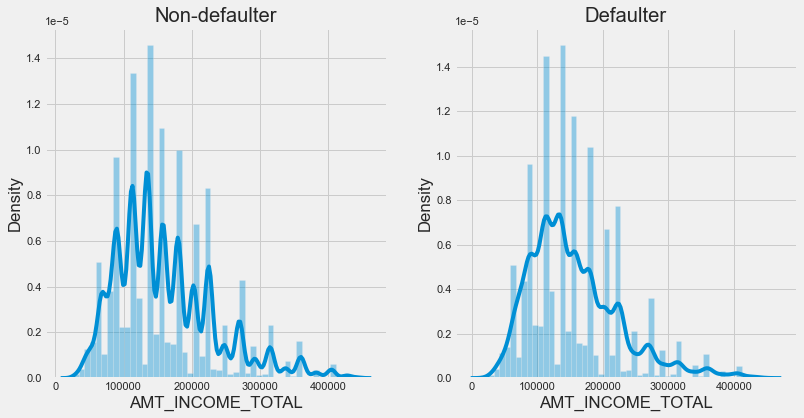

In [166]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.distplot(app_train_df[app_train_df["TARGET"] == 0]['AMT_INCOME_TOTAL'], ax= ax[0]).set(title = "Non-defaulter")
sns.distplot(app_train_df[app_train_df["TARGET"] == 1]['AMT_INCOME_TOTAL'], ax= ax[1]).set(title = "Defaulter")

[Text(0.5, 1.0, 'Defaulter')]

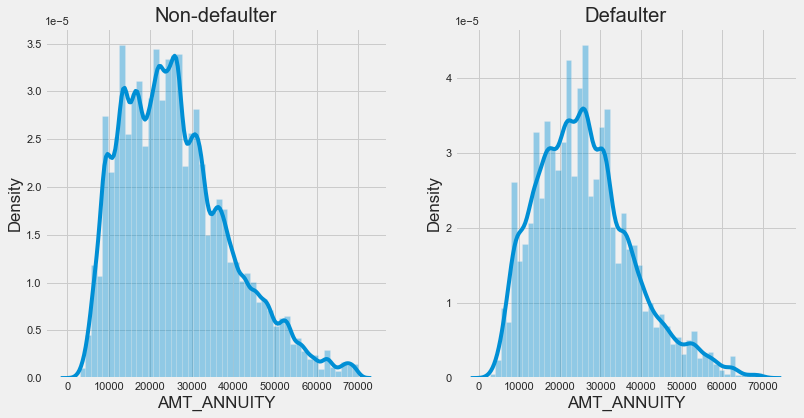

In [167]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.distplot(app_train_df[app_train_df["TARGET"] == 0]['AMT_ANNUITY'], ax= ax[0]).set(title = "Non-defaulter")
sns.distplot(app_train_df[app_train_df["TARGET"] == 1]['AMT_ANNUITY'], ax= ax[1]).set(title = "Defaulter")

In [ ]:
## Giữ AMT_INCOME_TOTAL và AMT_ANNUITY

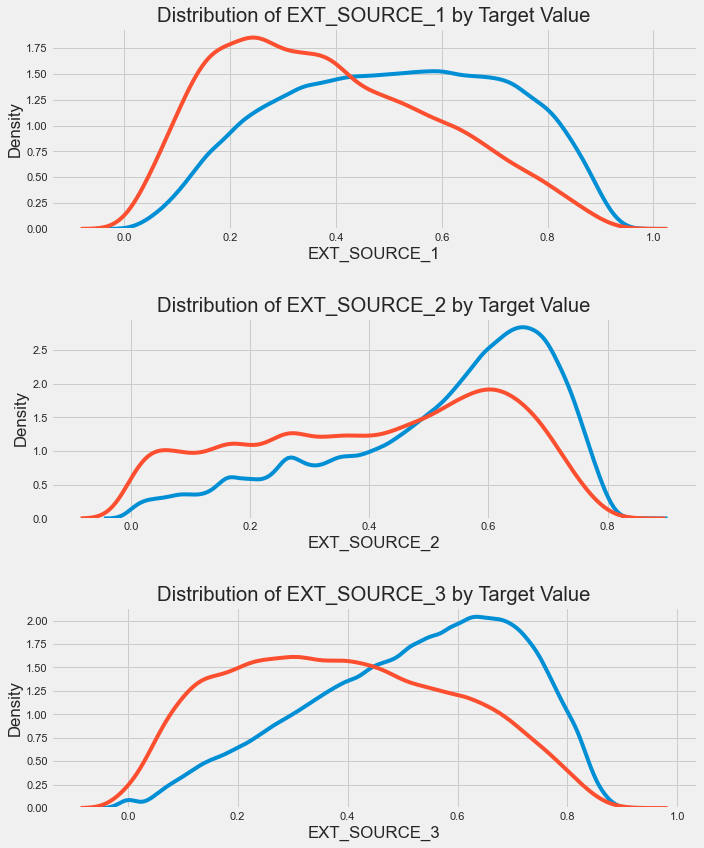

In [169]:
plt.figure(figsize = (10, 12))

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    plt.subplot(3, 1, i + 1)
    sns.kdeplot(app_train_df.loc[app_train_df['TARGET'] == 0, source], label = 'target == 0')
    sns.kdeplot(app_train_df.loc[app_train_df['TARGET'] == 1, source], label = 'target == 1')
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density')

plt.tight_layout(h_pad = 2.5)

0.035792    16062
0.046220    12381
0.030755    11919
0.025164    11772
0.026392    11335
            ...  
0.001417      465
0.001333      233
0.000533       39
0.000938       28
0.000290        2
Name: REGION_POPULATION_RELATIVE, Length: 81, dtype: int64